# Bidirectional LSTM 
## CS 230 / Joe Sommer / Dec 1 2019

This script is for implementing the Bidirectional LSTM to classify lyrics. 


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Bidirectional, Dropout, Embedding

import os
# print(os.listdir("../CS230_Project"))

# when training on AWS p2.xlarge, this command will ensure that you're training with the GPU: 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# you can run this command in a separate terminal tab in JupyterLab to monitor and sanity check whether your training is actually using GPU:
# $ watch -n 1 nvidia-smi 

In [2]:
# Import data

import pandas as pd
import seaborn as sb
%matplotlib inline

df = pd.read_csv('dataset_clean.csv')

In [3]:
lyrics = df['Lyrics'].values
years = df['Year'].values

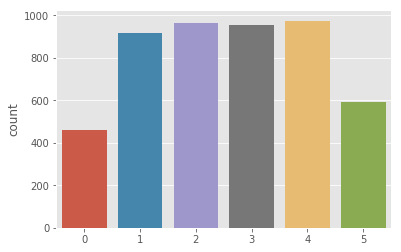

In [4]:
sb.countplot(years)

In [4]:
lyrics_train, lyrics_test, y_train, y_test = train_test_split(lyrics, years, test_size = 0.3, random_state = 1000)

In [ ]:
# TODO: Revisit with TFIDF vectorizer 

# vectorizer = CountVectorizer()
# vectorizer.fit(lyrics_train)

# X_train = vectorizer.transform(lyrics_train)
# X_test = vectorizer.transform(lyrics_test)

In [5]:
n_classes=6

years_train = tf.keras.utils.to_categorical(y_train,num_classes=n_classes)
years_test = tf.keras.utils.to_categorical(y_test,num_classes=n_classes)

5760


In [7]:
max_features = 10000
max_len = 1500

tok = text.Tokenizer(num_words=max_features, lower=False)

tok.fit_on_texts(list(lyrics_train)+list(lyrics_test))
X_train = tok.texts_to_sequences(lyrics_train)
X_test = tok.texts_to_sequences(lyrics_test)

x_train = sequence.pad_sequences(X_train,maxlen= max_len)
x_test = sequence.pad_sequences(X_test, maxlen = max_len)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Bidirectional(LSTM(10)))
# model.add(Dropout(0.5))
# model.add(layers.Dense(10, 
#                        bias_regularizer=regularizers.l1(0.01),
#                        kernel_regularizer=regularizers.l2(0.01),
#                        activation='relu'))
# model.add(Dropout(0.5))

model.add(layers.Dense(n_classes,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
n_epochs = 20
my_batch_size = 20

In [ ]:
history = model.fit(x_train, years_train, 
                    epochs=n_epochs,
                    verbose=True,
                    validation_data=(x_test, years_test),
<<<<<<< local
                    batch_size=my_batch_size) 
=======
                    batch_size=8) 

model.save('my_bidirectional.h5')

model.summary()
>>>>>>> remote

In [ ]:
X_train.shape

In [ ]:
model.summary()

In [8]:
# load model here, test on test set 
from tensorflow.keras.models import load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import CustomObjectScope

model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Bidirectional(LSTM(10)))
# model.add(Dropout(0.5))
# model.add(layers.Dense(10, 
#                        bias_regularizer=regularizers.l1(0.01),
#                        kernel_regularizer=regularizers.l2(0.01),
#                        activation='relu'))
# model.add(Dropout(0.5))

model.add(layers.Dense(n_classes,activation='softmax'))

model.load_weights('my_bidirectional.h5')

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
loss, accuracy = model.evaluate(x_train, years_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy)) # Prev 0.9941
loss, accuracy = model.evaluate(x_test, years_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) # prev 0.3777